In [ ]:
# Part 1: Data Loading and Basic Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from datetime import datetime

#Question
#Load the data
df = pd.read_csv('metadata.csv')

import pandas as pd
df = pd.read_csv("metadata.csv").sample(1000)
df.to_csv("metadata_sample.csv", index=False)


# Basic exploration
print('Dataset shape:', df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head

C:\Users\Kagasi\AppData\Local\Temp\ipykernel_16172\3325800332.py:11: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metadata.csv')


Dataset shape: (1056660, 19)

Column names:
['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files', 'url', 's2_id']

First 5 rows:


<bound method NDFrame.head of          cord_uid                                                sha  \
0        ug7v899j           d1aafb70c066a2068b02786f8929fd9c900897fb   
1        02tnwd4m           6b0567729c2143a66d737eb0a2f63f2dce2e5a7d   
2        ejv2xln0           06ced00a5fc04215949aa72528f2eeaae1d58927   
3        2b73a28n           348055649b6b8cf2b9a376498df9bf41f7123605   
4        9785vg6d           5f48792a5fa08bed9f56016f4981ae2ca6031b32   
...           ...                                                ...   
1056655  aeuy92bx  d86cfba423427426c10fa9092748733f5c7ca7e0; a8e5...   
1056656  n8hlrknq           b98985f125c3391aac709332e6380fe8b11ef6e5   
1056657  05dxn54t           0d1698212a1fcbbed2ffff38953397b3fb82f30d   
1056658  zpeij14g           9b2bbb5ceb21084931b5de7e0d60633e524a20bb   
1056659  pq54lvya           c7ae1a19b70e6e2806b670e4c0f64d3043698ee1   

                       source_x  \
0                           PMC   
1                           PMC   


In [13]:
# Question 2 : Basic Data Exploration

# Check the data types
print("\n=== Data types in the file ===")
df.info()

# Look for missing values
print("\n=== Missing values per column ===")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Basic statistics
print("\n=== Basic statistics (numerical columns) ===")
print(df.describe(include=[float, int]))

# Summary of categorical columns
print("\n=== Basic statistics (categorical columns) ===")
print(df.describe(include=[object]))

# Sample the data
print("\n=== Random sample of 10 rows ===")
print(df.sample(10))



=== Data types in the file ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files   

In [12]:
# Part 2: Data Cleaning and Preparation

# Handle missing values
print("Missing values per column:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Clean the data
# Remove rows where essential columns are missing
df_clean = df.dropna(subset=['title', 'publish_time']).copy()

# Convert dates
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean['year'] = df_clean['publish_time'].dt.year

# Filter for reasonable date range (COVID-19 era)
df_clean = df_clean[(df_clean['year'] >= 2019) & (df_clean['year'] <= 2023)]

# Create additional useful columns
df_clean['title_word_count'] = df_clean['title'].str.split().str.len()

# ✅ Add display section here
print("\nSample of cleaned data:")
print(df_clean.head())

print("\nNumber of rows after cleaning:", len(df_clean))

print("\nColumns after adding year and title_word_count:")
print(df_clean[['publish_time', 'year', 'title_word_count']].head())


Missing values per column:
sha                  682894
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

Sample of cleaned data:
      cord_uid                                       sha source_x  \
3552  qlwzl5mq  4c7f6c52fe043745887db5406196b1d5099c9614      PMC   
3571  eqgc8v7y  e5c06914d0daee6e881665b23adca340d0a6271a      PMC   
3583  c22kw6f4  ae56d60debc175395e6269fc5bf9184291e71a56      PMC   
3584  hbpk850a  ca8f30a35b564945dd2588c382a0e181a1e08662      PMC   
3588  7o47l32b  b797b4d3c0a5ecfdb0b08679c45648cad8f97795      PMC   

                                                  title  \
3552  Multipl

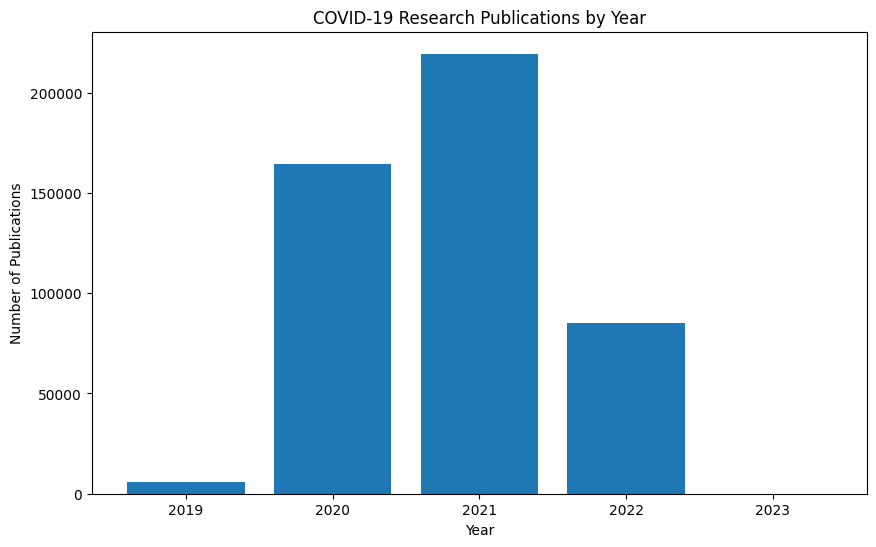

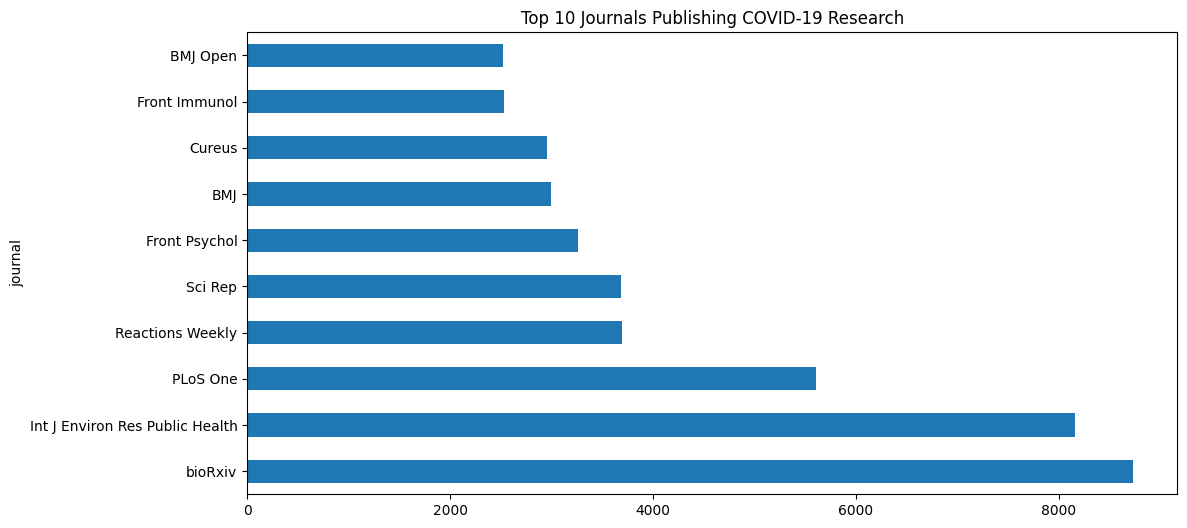

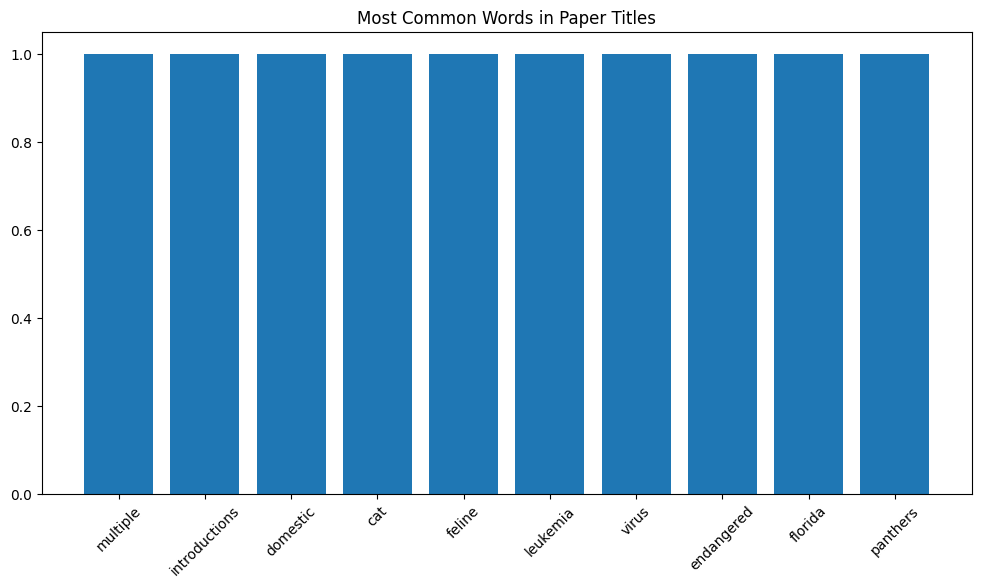

In [14]:
# Part 3: Data Visualization and analysis

#5&6. Perform basic analysis and create visualizations-Publications by year
yearly_counts = df_clean['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.title('COVID-19 Research Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

#5 &6. Perform basic analysis and create visualizations- Top journals
top_journals = df_clean['journal'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_journals.plot(kind='barh')
plt.title('Top 10 Journals Publishing COVID-19 Research')
plt.show()

#6. Generate word cloud of paper titles
def get_word_frequency(titles):
    all_words = []
    for title in titles.dropna():
        words = re.findall(r'\b[a-zA-Z]{3,}\b', title.lower())
        all_words.extend(words)
        return Counter(all_words)
    
word_freq = get_word_frequency(df_clean['title'])
common_words = dict(word_freq.most_common(20))

plt.figure(figsize=(12,6))
plt.bar(common_words.keys(), common_words.values())
plt.xticks(rotation=45)
plt.title('Most Common Words in Paper Titles')
plt.show()

